In [112]:
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import spacy
import ssl
from textblob import TextBlob

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/david/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/david/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# How does tweets effect Apple's stock price

## 1. import data 

In [11]:
tweets_df = pd.read_csv('/Users/david/Code_Files/projects/project4/data/tweet.csv')
tweets_df.head(10)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0.0,0.0,1.0
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0.0,0.0,0.0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0.0,0.0,0.0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0.0,0.0,1.0
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0.0,0.0,1.0
5,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0.0,0.0,1.0
6,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0.0,0.0,1.0
7,550443857142611968,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0.0,0.0,1.0
8,550443857595600896,iknowfirst_br,1420071017,Swing Trading: Up To 8.91% Return In 14 Days h...,0.0,0.0,1.0
9,550443857692078081,Gold_prediction,1420071017,Swing Trading: Up To 8.91% Return In 14 Days h...,0.0,0.0,1.0


In [6]:
company_tweets_df = pd.read_csv('/Users/david/Code_Files/projects/project4/data/Company_Tweet.csv')
company_tweets_df.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [7]:
company_tweets_df['ticker_symbol'].unique()

array(['AAPL', 'GOOG', 'GOOGL', 'AMZN', 'MSFT', 'TSLA'], dtype=object)

In [16]:
apple_stock_df = pd.read_csv('/Users/david/Code_Files/projects/project4/data/AAPL.csv')
apple_stock_df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [17]:
apple_stock_df.shape

(1258, 15)

# 2. Data Preprocessing 

a. merge company tweets with tweets table

In [24]:
company_tweets_df = company_tweets_df[company_tweets_df['ticker_symbol'] == 'AAPL']
apple_tweets_df = company_tweets_df.merge(tweets_df, on = 'tweet_id')
apple_tweets_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0.0,0.0,1.0
1,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0.0,0.0,1.0
2,550803225113157632,AAPL,MacHashNews,1420156696,Rumor Roundup: What to expect when you're expe...,0.0,0.0,0.0
3,550802957370159104,AAPL,WaltLightShed,1420156633,"An $AAPL store line in Sapporo Japan for the ""...",2.0,4.0,4.0
4,550802855129382912,AAPL,2waystrading,1420156608,$AAPL - Will $AAPL Give Second entry opportuni...,0.0,0.0,0.0


b. convert post_date to YYYY-MM-DD format

In [89]:
apple_tweets_df['post_date'] = pd.to_datetime(apple_tweets_df['post_date'], unit='s').dt.normalize()
apple_tweets_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,polarity,subjectivity,sentiment,Sentiment_Score
0,550803612197457920,AAPL,SentiQuant,2015-01-01 00:00:00+00:00,toptickertweets aapl imrs baba ebay amzn ign s...,0.0,0.0,1.0,0.000000,0.000000,neutral,0
1,550803610825928706,AAPL,SentiQuant,2015-01-01 00:00:00+00:00,sentishiftup k fb googl g gold aapl baba twtr ...,0.0,0.0,1.0,0.000000,0.000000,neutral,0
2,550803225113157632,AAPL,MacHashNews,2015-01-01 00:00:00+00:00,rumor roundup expect expecting 2015 tuaw aapl,0.0,0.0,0.0,0.000000,0.000000,neutral,0
3,550802957370159104,AAPL,WaltLightShed,2015-01-01 00:00:00+00:00,aapl store line sapporo japan lucky bag pic ht,2.0,4.0,4.0,0.333333,0.833333,positive,1
4,550802855129382912,AAPL,2waystrading,2015-01-01 00:00:00+00:00,aapl aapl give second entry opportunity,0.0,0.0,0.0,0.000000,0.000000,neutral,0


c. preprocess the body part from the apple_tweets_df, steps like lowercasing, punctuation removal, tokenization, lemmatization, stop word removal, etc. 

In [90]:
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    
    # Tokenization 
    text = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    
    # Remove punctuations
    text = [word for word in text if word.isalnum()]
    
    return text

In [91]:
apple_tweets_df['body'] = apple_tweets_df['body'].apply(preprocess_text)

In [92]:
apple_tweets_df['body']

0         [toptickertweets, aapl, imrs, baba, ebay, amzn...
1         [sentishiftup, k, fb, googl, g, gold, aapl, ba...
2         [rumor, roundup, expect, expecting, 2015, tuaw...
3         [aapl, store, line, sapporo, japan, lucky, bag...
4            [aapl, aapl, give, second, entry, opportunity]
                                ...                        
445902    [apple, aapl, five, reason, upgrade, io, hopef...
445903    [apple, aapl, five, reason, upgrade, io, hopef...
445904    [apple, aapl, senate, hold, contempt, free, sp...
445905    [apple, aapl, senate, hold, contempt, free, sp...
445906    [commented, apple, iphone, deterioration, wors...
Name: body, Length: 445907, dtype: object

# 3. Sentiment Analysis

For sentiment analysis on 'body', I am going to use TextBlob. It returns two properties for each piece of text: 
1. Polarity: float that lies between -1 and 1. -1 indicates negative sentiment and 1 indicaes positive. 
2. Subjectivity: float that lies between 0 and 1. A subjective text is often refer to personal opinion, emotion.

In [93]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

join the body texts back to a string

In [94]:
apple_tweets_df['body'] = [' '.join(map(str, l)) for l in apple_tweets_df['body']]

In [48]:
apple_tweets_df['polarity'] = apple_tweets_df['body'].apply(getPolarity)
apple_tweets_df['subjectivity'] = apple_tweets_df['body'].apply(getSubjectivity)
apple_tweets_df['sentiment'] = apple_tweets_df['polarity'].apply(getSentiment)

In [49]:
apple_tweets_df.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,polarity,subjectivity,sentiment
0,550803612197457920,AAPL,SentiQuant,2015-01-01 23:59:49,toptickertweets aapl imrs baba ebay amzn ign s...,0.0,0.0,1.0,0.000000,0.000000,neutral
1,550803610825928706,AAPL,SentiQuant,2015-01-01 23:59:48,sentishiftup k fb googl g gold aapl baba twtr ...,0.0,0.0,1.0,0.000000,0.000000,neutral
2,550803225113157632,AAPL,MacHashNews,2015-01-01 23:58:16,rumor roundup expect expecting 2015 tuaw aapl,0.0,0.0,0.0,0.000000,0.000000,neutral
3,550802957370159104,AAPL,WaltLightShed,2015-01-01 23:57:13,aapl store line sapporo japan lucky bag pic ht,2.0,4.0,4.0,0.333333,0.833333,positive
4,550802855129382912,AAPL,2waystrading,2015-01-01 23:56:48,aapl aapl give second entry opportunity,0.0,0.0,0.0,0.000000,0.000000,neutral


In [57]:
print("positive tweets:", apple_tweets_df['sentiment'].value_counts()['positive'])
print("negative tweets:", apple_tweets_df['sentiment'].value_counts()['negative'])

positive tweets: 139474
negative tweets: 47820


# 4. Feature Engineering

a. mapping out the sentiment scores, which could be useful for correlation analysis later

In [95]:
sentiment_mapping = {'negative': -1, 'positive': 1, 'neutral': 0}
apple_tweets_df['Sentiment_Score'] = apple_tweets_df['sentiment'].map(sentiment_mapping)

b. aggregate sentiment data by date to match stock data

In [108]:
average_sentiment = apple_tweets_df.groupby(apple_tweets_df['post_date'])['Sentiment_Score'].mean()
average_sentiment

post_date
2015-01-01 00:00:00+00:00    0.217391
2015-01-02 00:00:00+00:00    0.202999
2015-01-03 00:00:00+00:00    0.427746
2015-01-04 00:00:00+00:00    0.342365
2015-01-05 00:00:00+00:00    0.312990
                               ...   
2016-03-16 00:00:00+00:00    0.126582
2016-03-17 00:00:00+00:00    0.173641
2016-03-18 00:00:00+00:00    0.182196
2016-03-19 00:00:00+00:00    0.228833
2016-03-20 00:00:00+00:00    0.300000
Name: Sentiment_Score, Length: 438, dtype: float64

c. join with apple stock table

In [104]:
apple_stock_df['date'] = pd.to_datetime(apple_stock_df['date'])

merged_df = pd.merge(apple_stock_df, average_sentiment, left_on='date', right_index=True, how='left')
merged_df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Sentiment_Score
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0,0.173494
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0,0.165954
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0,0.211429
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0,0.201951
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0,0.178069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0,NaN
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0,NaN
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0,NaN
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0,NaN


In [110]:
merged_df = merged_df.dropna(subset=['Sentiment_Score'])
merged_df.shape

(204, 16)

There are only 204 rows of valid data, so keep in mind later the analysis may encounter problems like overfitting, etc.

# 5. Exploratory Data Analysis (EDA)

In [111]:
merged_df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Sentiment_Score
count,204.000000,204.000000,204.000000,204.000000,204.000000,2.040000e+02,204.000000,204.000000,204.000000,204.000000,2.040000e+02,204.000000,204.0,204.000000
mean,102.671569,112.816176,113.981306,111.634607,112.881422,4.972956e+07,104.567994,105.648114,103.472354,104.628245,4.972956e+07,0.007647,1.0,0.172045
std,59.610848,10.616200,10.506600,10.823468,10.688447,2.123904e+07,9.448691,9.338019,9.650335,9.515737,2.123904e+07,0.062748,0.0,0.038211
min,0.000000,93.420000,94.500000,92.000000,93.130000,1.304644e+07,86.849432,87.872065,85.163074,87.045890,1.304644e+07,0.000000,1.0,0.063474
25%,51.750000,105.090000,106.430000,103.762500,105.292500,3.512530e+07,97.829479,99.467856,96.751285,98.178142,3.512530e+07,0.000000,1.0,0.147823
50%,102.500000,113.725000,114.885000,112.320000,113.650000,4.536847e+07,105.310621,106.500716,104.051688,105.204167,4.536847e+07,0.000000,1.0,0.173539
75%,154.250000,120.540000,121.810000,119.490000,120.967500,5.609455e+07,111.624860,112.951054,110.610171,111.973495,5.609455e+07,0.000000,1.0,0.196689
max,205.000000,132.070000,132.970000,131.100000,132.850000,1.622063e+08,121.705596,122.534967,120.811718,122.424384,1.622063e+08,0.520000,1.0,0.280203


a. Time-Series analysis

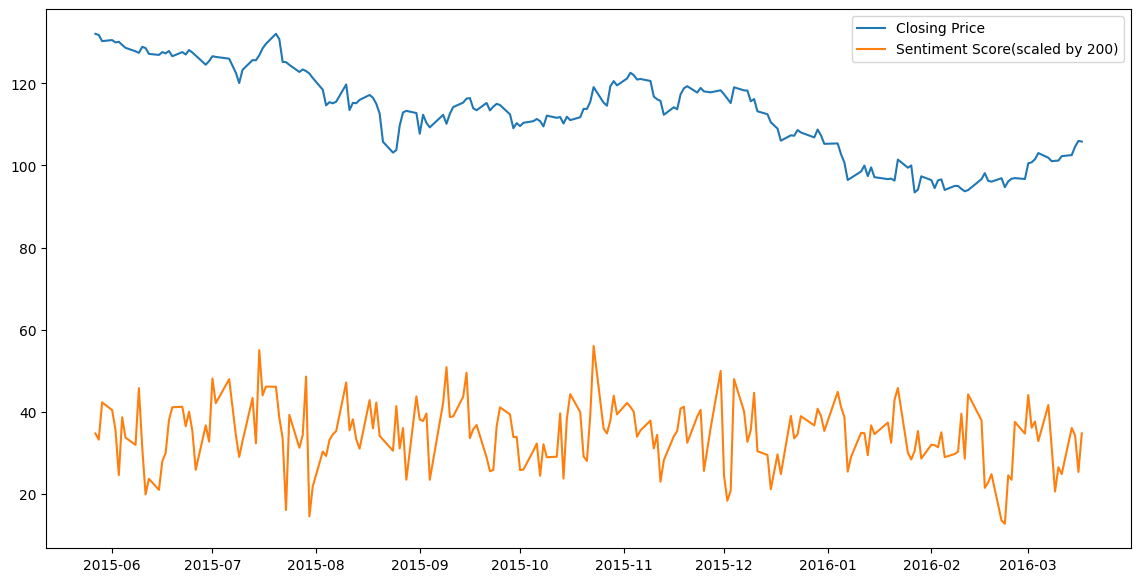

In [139]:
plt.figure(figsize=(14, 7))
plt.plot(merged_df['date'], merged_df['close'], label='Closing Price')
plt.plot(merged_df['date'], merged_df['Sentiment_Score']*200, label='Sentiment Score(scaled by 200)')
plt.legend()
plt.show()

b. Correlation analysis

In [122]:
merged_df[['close', 'Sentiment_Score']].corr()

,close,Sentiment_Score
close,1.000000,0.219661
Sentiment_Score,0.219661,1.000000


c. Distribution of sentiment score

<Axes: >

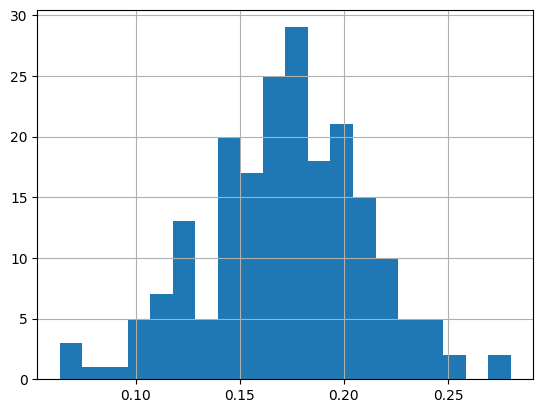

In [120]:
merged_df['Sentiment_Score'].hist(bins=20)

The correlation between closing price of the day is about 0.22, which is a rather weak correlation. After further analysis, it is possible there is a 'lag' in the time-series analysis. Instead, we should look at the sentiment score on that day and the price difference between that day and the following day. 

d. new time-series analysis

In [123]:
# Create a new column for next day's closing price
merged_df['next_day_close'] = merged_df['close'].shift(-1)

# Calculate the difference in closing price
merged_df['close_difference'] = merged_df['next_day_close'] - merged_df['close']

# Drop the last row as it will have a NaN value for 'next_day_close' and 'close_difference'
merged_df = merged_df[:-1]

/var/folders/_h/y97f273d48b9yk9g59hq9hcc0000gn/T/ipykernel_94483/2767294805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['next_day_close'] = merged_df['close'].shift(-1)
/var/folders/_h/y97f273d48b9yk9g59hq9hcc0000gn/T/ipykernel_94483/2767294805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['close_difference'] = merged_df['next_day_close'] - merged_df['close']


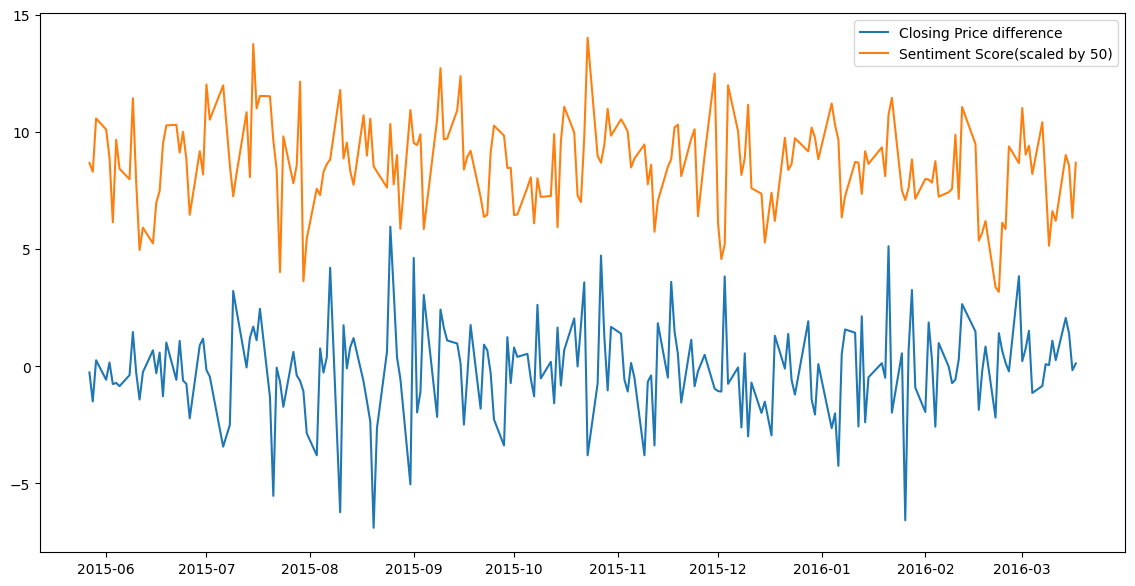

In [142]:
plt.figure(figsize=(14, 7))
plt.plot(merged_df['date'], merged_df['close_difference'], label='Closing Price difference')
plt.plot(merged_df['date'], merged_df['Sentiment_Score']*50, label='Sentiment Score(scaled by 50)')
plt.legend()
plt.show()

In [143]:
merged_df[['Sentiment_Score', 'close_difference']].corr()

,Sentiment_Score,close_difference
Sentiment_Score,1.000000,-0.045306
close_difference,-0.045306,1.000000


As you can see, the correlation got even smaller: -0.0453. It means a very weak correlation between the average sentiment score of tweets of the day and the stock price for Apple. However, it is important to also keep in mind that stock price is determined by many factors. At the same time, to further look into this relationship, I decide to also look at the max and min value of sentiment score of the day because sometimes one tweet can have more effect on stock price. 

e. new approach from max and min sentiment score analysis

In [147]:
max_min_sentiment = apple_tweets_df.groupby('post_date')['Sentiment_Score'].agg(['max', 'min'])
max_min_sentiment

,max,min
post_date,,
2015-01-01 00:00:00+00:00,1,-1
2015-01-02 00:00:00+00:00,1,-1
2015-01-03 00:00:00+00:00,1,-1
2015-01-04 00:00:00+00:00,1,-1
2015-01-05 00:00:00+00:00,1,-1
...,...,...
2016-03-16 00:00:00+00:00,1,-1
2016-03-17 00:00:00+00:00,1,-1
2016-03-18 00:00:00+00:00,1,-1


I realized that on most days the max and min value of sentiment is either 1 or -1. So instead I am going to look at the proportion of tweets each day that reach these extreme sentiment scores. This could give a sense of the overall "polarity" or "intensity" of sentiment about Apple on Twitter each day.

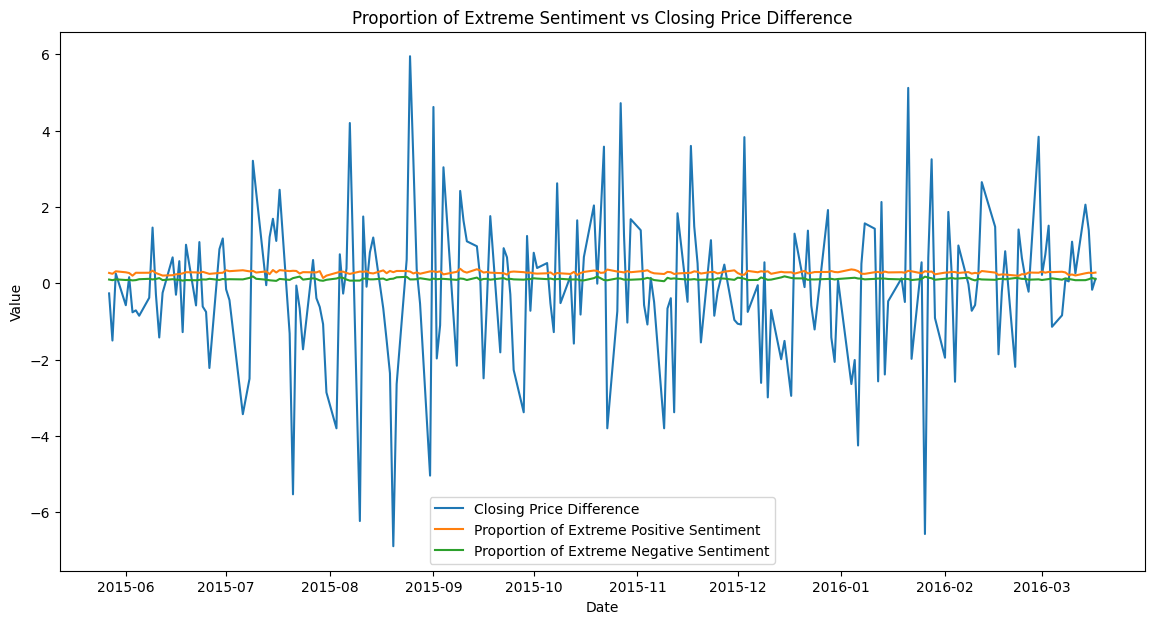

In [151]:
# Add columns indicating whether each tweet has extreme positive or negative sentiment
apple_tweets_df['extreme_pos_sentiment'] = apple_tweets_df['Sentiment_Score'] == 1
apple_tweets_df['extreme_neg_sentiment'] = apple_tweets_df['Sentiment_Score'] == -1

# Group by date and calculate the proportion of tweets each day with extreme positive or negative sentiment
extreme_sentiment = apple_tweets_df.groupby('post_date')[['extreme_pos_sentiment', 'extreme_neg_sentiment']].mean()

# Merge this with your stock price DataFrame
merged_df = pd.merge(apple_stock_df, extreme_sentiment, how='inner', left_on='date', right_index=True)

# Calculate the difference in closing price
merged_df['next_day_close'] = merged_df['close'].shift(-1)
merged_df['close_difference'] = merged_df['next_day_close'] - merged_df['close']

# Drop the last row as it will have a NaN value for 'next_day_close' and 'close_difference'
merged_df = merged_df[:-1]

# Plotting proportion of extreme sentiment scores
plt.figure(figsize=(14, 7))
plt.plot(merged_df['date'], merged_df['close_difference'], label='Closing Price Difference')
plt.plot(merged_df['date'], merged_df['extreme_pos_sentiment'], label='Proportion of Extreme Positive Sentiment')
plt.plot(merged_df['date'], merged_df['extreme_neg_sentiment'], label='Proportion of Extreme Negative Sentiment')
plt.legend()
plt.title("Proportion of Extreme Sentiment vs Closing Price Difference")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [152]:
print(merged_df[['extreme_pos_sentiment', 'extreme_neg_sentiment', 'close_difference']].corr())

                       extreme_pos_sentiment  extreme_neg_sentiment  \
extreme_pos_sentiment               1.000000               0.224614   
extreme_neg_sentiment               0.224614               1.000000   
close_difference                   -0.082690              -0.053966   

                       close_difference  
extreme_pos_sentiment         -0.082690  
extreme_neg_sentiment         -0.053966  
close_difference               1.000000  


Again, there is no strong correlation between the sentiment score and closing price difference. As a result, it is only clear that stock price is not mainly affect by tweets. 

# 6. Conclusion and Evaluation 

1. Tweet sentiment might not directly influence Apple's stock price. At least based on the data and analysis I conducted, there doesn't seem to be a strong correlation. This could mean that, for Apple, other factors are more influential in driving stock price changes.
2. The impact of tweet sentiment could be more complex. For example, the effect might not be immediate, or it might depend on other factors. Perhaps sentiment only impacts stock price under certain conditions, or perhaps the relationship is non-linear. My analysis doesn't rule out these possibilities.
3. Consider the nature of the data. Twitter data and stock prices are both quite noisy, meaning they can be influenced by many factors and can fluctuate from day to day. With the amount of data and models I have right now I might not be able to uncover the more subtle patterns. 